In [53]:
%matplotlib inline
from random import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)
    
def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [10]:
def f(lower, upper, current, eta):
    r = random()
    delta_1 = (current - lower) / (upper - lower)
    delta_2 = (upper - current) / (upper - lower)
    delta_q = None
    if r < 0.5:
        delta_q = ((2 * r) + (1 - 2 * r) * (1 - delta_1) ** (eta + 1)) ** (1 / (eta + 1)) - 1
    else:
        delta_q = 1 - (2 * (1 - r) + 2 * (r - 0.5) * (1 - delta_2) ** (eta + 1)) ** (1 / (eta + 1))
    return current + delta_q * (upper - lower)

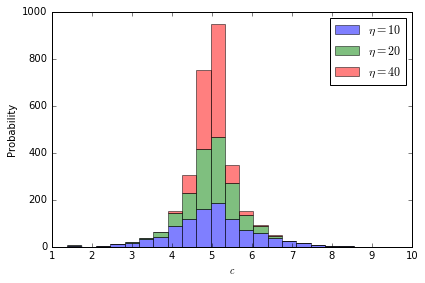

In [75]:
values = {"$\eta = 20$": pd.Series([f(1, 10, 5, 20) for x in range(1000)])}

df = pd.DataFrame({
            "$\eta = 20$": pd.Series([f(1, 10, 5, 20) for x in range(1000)]),
            "$\eta = 40$": pd.Series([f(1, 10, 5, 40) for x in range(1000)]),
            "$\eta = 10$": pd.Series([f(1, 10, 5, 10) for x in range(1000)]),
         })
ax = df.plot.hist(stacked=True, alpha=0.5, bins=20)
ax.set_xlabel("$c$")
ax.set_xlim((1, 10))
ax.set_ylabel("Probability")
plt.tight_layout()
plt.savefig("mutation_eta.pdf")

In [64]:
df = pd.DataFrame({
            "$\eta = 20$": pd.Series([f(1, 10, 5, 20) for x in range(1000)]),
            "$\eta = 40$": pd.Series([f(1, 10, 5, 40) for x in range(1000)]),
            "$\eta = 10$": pd.Series([f(1, 10, 5, 10) for x in range(1000)]),
         })

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6115f6a1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f611c43aa20>]], dtype=object)

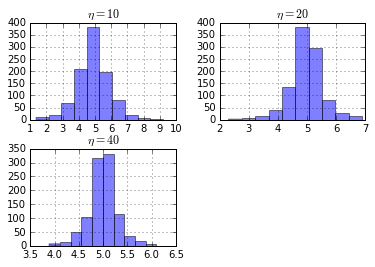

In [73]:
plt.figure()
df.hist(stacked=True, alpha=0.5)

In [70]:
df.columns

Index(['$\eta = 10$', '$\eta = 20$', '$\eta = 40$'], dtype='object')